<a href="https://colab.research.google.com/github/thomngt/DataMining_Project/blob/main/DataMining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up


In [ ]:
#Các thư viện
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
import pydotplus         as pdp
import scipy             as scp
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
from sklearn.preprocessing   import LabelEncoder, MinMaxScaler
from sklearn.decomposition   import PCA
from IPython.display         import Image
from sklearn                 import tree
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score
from google.colab            import drive
from sklearn.linear_model    import LogisticRegression
from sklearn.metrics         import confusion_matrix, classification_report
from wordcloud               import WordCloud
from sklearn.ensemble        import RandomForestClassifier
drive.mount('/content/gdrive', force_remount = True)
folder = '/content/drive/MyDrive/LTPTDL/'

Mounted at /content/gdrive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install plotly

In [ ]:
data = pd.read_csv(folder + '/Womens Clothing E-Commerce Reviews.csv')
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


- Clothing ID: Mã sản phẩm.
- Age: Tuổi người đánh giá.
- Title: Tiêu đề của đánh giá.
- Review Text: Nội dung của đánh giá.
- Rating: Điểm đánh giá trên thang từ 1 (Tệ nhất) đến 5 (Tốt nhất) do khách hàng đánh giá.
- Recommended IND : Khách hàng có đề xuất sản phẩm này không? 1- có. 0- không
- Positive Feedback Count: Số lượng phản hồi thấy đánh giá này là tích cực.
- Division Name: Tên phân loại chung của sản phẩm.
- Department Name: Tên bộ phận của sản phẩm.
- Class Name Tên lớp: Tên loại của sản phẩm.


# Chương 2. Tổng quan bộ dữ liệu

## 1.Phân tích khám phá

In [ ]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [ ]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


## 2.Nhận diện các biến

In [ ]:
data = data.drop(['Unnamed: 0','Clothing ID', ], axis=1)

In [ ]:
data = data.drop(['Title','Review Text','Positive Feedback Count'], axis=1)

In [ ]:
data["Rating"] = data["Rating"].astype(object)
data["Recommended IND"] = data["Recommended IND"].astype(object)

In [ ]:
data

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name
0,33,4,1,Initmates,Intimate,Intimates
1,34,5,1,General,Dresses,Dresses
2,60,3,0,General,Dresses,Dresses
3,50,5,1,General Petite,Bottoms,Pants
4,47,5,1,General,Tops,Blouses
...,...,...,...,...,...,...
23481,34,5,1,General Petite,Dresses,Dresses
23482,48,3,1,General Petite,Tops,Knits
23483,31,3,0,General Petite,Dresses,Dresses
23484,28,3,1,General,Dresses,Dresses


## 3.Thống kê dữ liệu

In [ ]:
print('Số danh mục của mỗi biến')
print(data.nunique())

Số danh mục của mỗi biến
Age                77
Rating              5
Recommended IND     2
Division Name       3
Department Name     6
Class Name         20
dtype: int64


In [ ]:
print('Bộ dữ liệu có: ', data.shape[0], 'dòng', data.shape[1], 'cột')
print('Các cột dữ liệu:\n', '\n'.join(data.columns[0:]))

Bộ dữ liệu có:  23486 dòng 6 cột
Các cột dữ liệu:
 Age
Rating
Recommended IND
Division Name
Department Name
Class Name


# Chương 3. Tiền xử lý dữ liệu


## I. Dữ liệu

In [ ]:
dinh_danh = []
dinh_tinh = []
dinh_luong = []

for col in data.columns:
    if data[col].dtype == 'object':
        unique_values = data[col].unique()
        if all(str(val).isnumeric() for val in unique_values):
            dinh_tinh.append(col)
        else:
            dinh_danh.append(col)
    else:
        dinh_luong.append(col)

print('Biến định tính:')
for var in dinh_tinh:
    print(var)

print('\nBiến định danh:')
for var in dinh_danh:
    print(var)

print('\nBiến định lượng:')
for var in dinh_luong:
    print(var)

Biến định tính:
Rating
Recommended IND

Biến định danh:
Division Name
Department Name
Class Name

Biến định lượng:
Age


In [ ]:
data.describe(include = 'O')

,Rating,Recommended IND,Division Name,Department Name,Class Name
count,23486,23486,23472,23472,23472
unique,5,2,3,6,20
top,5,1,General,Tops,Dresses
freq,13131,19314,13850,10468,6319


## II. Phân tích đơn biến

### Age

    Nhóm tuổi  Số lượng người đánh giá
0    <20 tuổi                      186
1  20-35 tuổi                    28861
2  35-54 tuổi                    50070
3    55+ tuổi                    19431


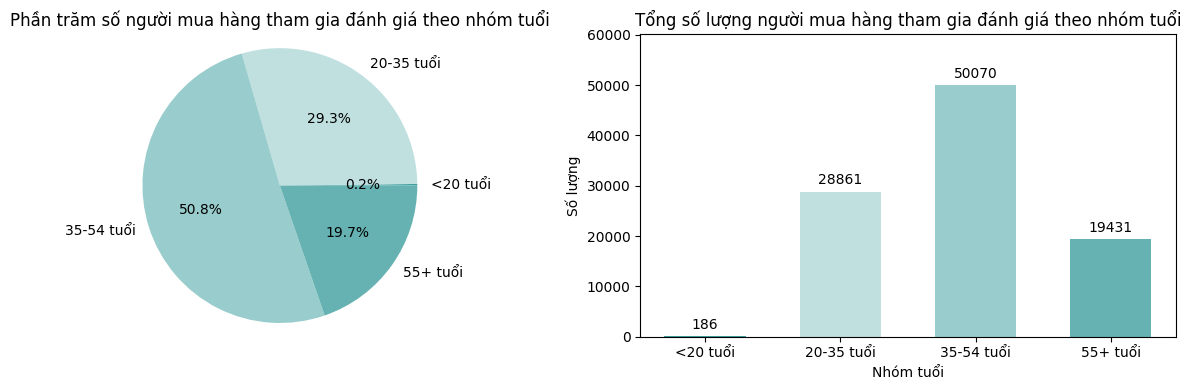

In [ ]:
# Biểu đồ thể hiện nhóm tuổi theo số lượng rating
age_groups = ['<20 tuổi', '20-35 tuổi', '35-54 tuổi', '55+ tuổi']
rating_counts = [0, 0, 0, 0]

for index, row in data.iterrows():
    age = row['Age']
    rating = row['Rating']

    if age < 20:
        rating_counts[0] += rating
    elif age <= 35:
        rating_counts[1] += rating
    elif age <= 54:
        rating_counts[2] += rating
    else:
        rating_counts[3] += rating

data_dict = {'Nhóm tuổi': age_groups, 'Số lượng người đánh giá': rating_counts}
rating_count = pd.DataFrame(data_dict)
print(rating_count )
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
colors = [ '#40A0A0', '#C0E0E0', '#99CCCC', '#66B2B2']

# Biểu đồ tròn
ax1.pie(rating_counts, labels=age_groups, autopct='%1.1f%%', colors=colors)
ax1.axis('equal')
ax1.set_title('Phần trăm số người mua hàng tham gia đánh giá theo nhóm tuổi')

# Biểu đồ cột
bar_width = 0.6
bars = ax2.bar(age_groups, rating_counts, color=colors, width=bar_width)
ax2.set_title('Tổng số lượng người mua hàng tham gia đánh giá theo nhóm tuổi')
ax2.set_xlabel('Nhóm tuổi')
ax2.set_ylabel('Số lượng')
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', va='bottom')
ax2.set_ylim(0, max(rating_counts) * 1.2)

plt.tight_layout()
plt.show()

### Recommended IND

  Recommended IND  Số lượng
0              Có     19314
1           Không      4172


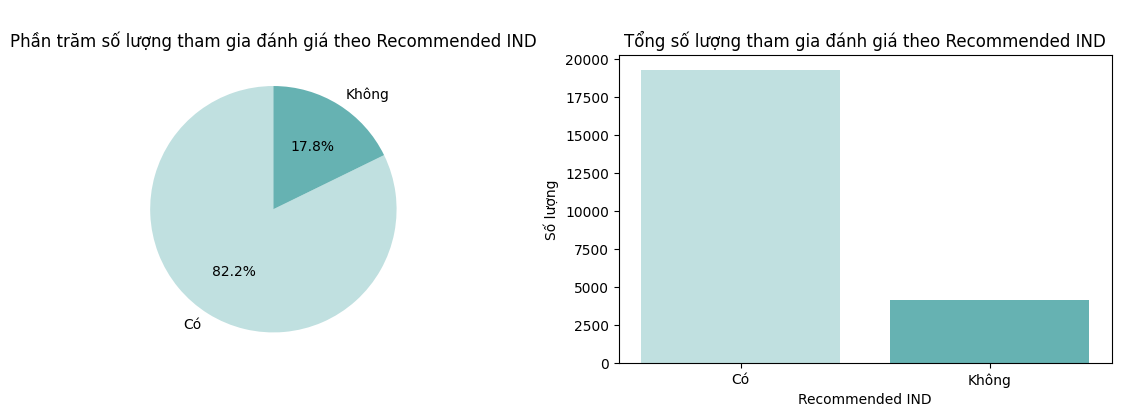

In [ ]:
data_recommended = data["Recommended IND"].value_counts().rename({1: 'Có', 0: 'Không'}).reset_index()
data_recommended = data_recommended.rename(columns={"index": "Recommended IND", "Recommended IND": "Số lượng"})
print(data_recommended)

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
colors = ['#C0E0E0', '#66B2B2']


# Biểu đồ tròn
ax[0].pie(data_recommended["Số lượng"], labels=data_recommended["Recommended IND"], colors=colors, autopct='%1.1f%%', startangle=90)
ax[0].set_title("Phần trăm số lượng tham gia đánh giá theo Recommended IND")

# Biểu đồ cột
ax[1].bar(data_recommended["Recommended IND"], data_recommended["Số lượng"], color=colors)
ax[1].set_title("\nTổng số lượng tham gia đánh giá theo Recommended IND")
ax[1].set_xlabel("Recommended IND")
ax[1].set_ylabel("Số lượng")

# Hiển thị biểu đồ
plt.show()

### Rating

   Rating  Số lượng
4       1       842
3       2      1565
2       3      2871
1       4      5077
0       5     13131


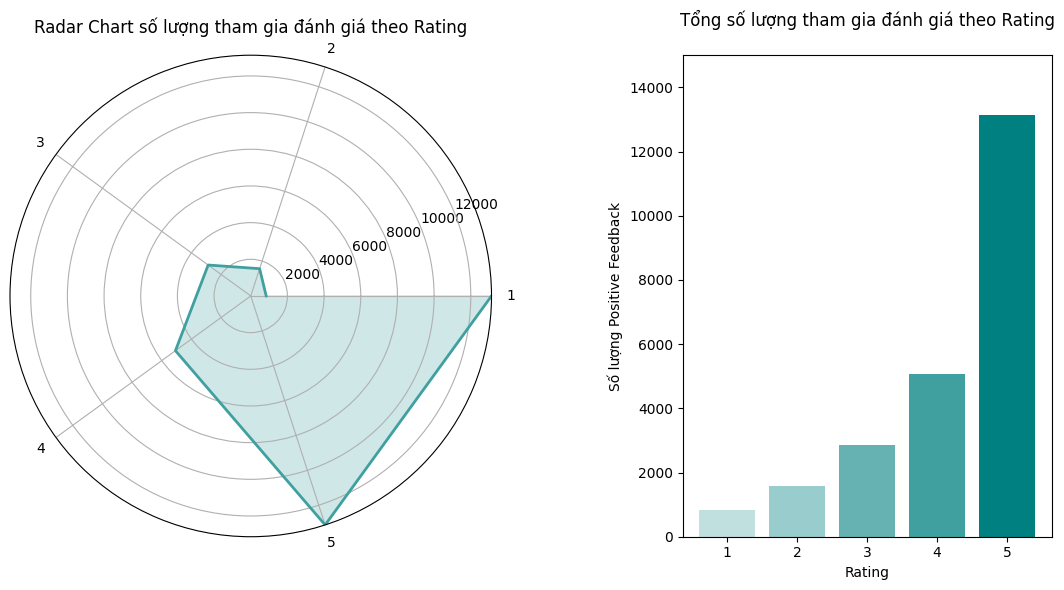

In [ ]:
rating_counts = data['Rating'].value_counts().reset_index()
rating_counts = rating_counts.rename(columns={'index': 'Rating', 'Rating': 'Số lượng'})
rating_counts = rating_counts.sort_values(by='Rating')
print(rating_counts)

categories = rating_counts['Rating']
values = rating_counts['Số lượng']
num_categories = len(categories)
angles = np.linspace(0, 2 * np.pi, num_categories, endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(1, 2, width_ratios=[2, 1])
colors = ['#C0E0E0', '#99CCCC', '#66B2B2', '#40A0A0', '#008080']

# Biểu đồ radar
ax1 = fig.add_subplot(gs[0], polar=True)
ax1.fill(angles, values, color=colors[3], alpha=0.25)
ax1.plot(angles, values, color=colors[3], linewidth=2)
ax1.set_thetagrids(np.degrees(angles[:-1]), categories)
ax1.set_ylim(0, max(values))
ax1.set_title('Radar Chart số lượng tham gia đánh giá theo Rating')

# Biểu đồ cột
ax2 = fig.add_subplot(gs[1])
bar_width = 0.6
bars = ax2.bar(rating_counts['Rating'], rating_counts['Số lượng'], color=colors)
ax2.set_title('Tổng số lượng tham gia đánh giá theo Rating\n')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Số lượng Positive Feedback')
ax2.set_ylim(0, 15000)

plt.tight_layout()
plt.show()

### Division Name

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64


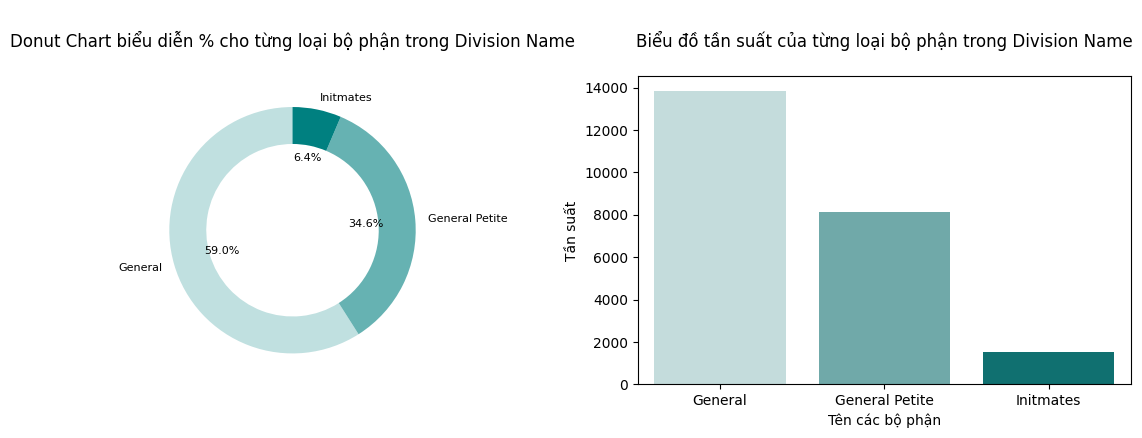

In [ ]:
colors = ['#C0E0E0', '#66B2B2', '#008080']

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
data_for_donut = data['Division Name'].value_counts()
print(data_for_donut)
wedges, text, autotext = ax[0].pie(data_for_donut.values, labels = data_for_donut.index, autopct='%1.1f%%', startangle = 90, colors = colors, wedgeprops = dict(width=0.3), textprops={'fontsize': 8})
ax[0].add_artist(plt.Circle((0, 0), 0.2, fc='white'))
ax[0].set_title("\nDonut Chart biểu diễn % cho từng loại bộ phận trong Division Name\n")

# Subplot 2: Countplot
sns.countplot(x = "Division Name", data = data, order = data_for_donut.index, palette = colors, ax=ax[1])
ax[1].set_title("\nBiểu đồ tần suất của từng loại bộ phận trong Division Name\n")
ax[1].set_ylabel("Tần suất")
ax[1].set_xlabel("Tên các bộ phận")

# Hiển thị biểu đồ
plt.show()

### Department Name

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64


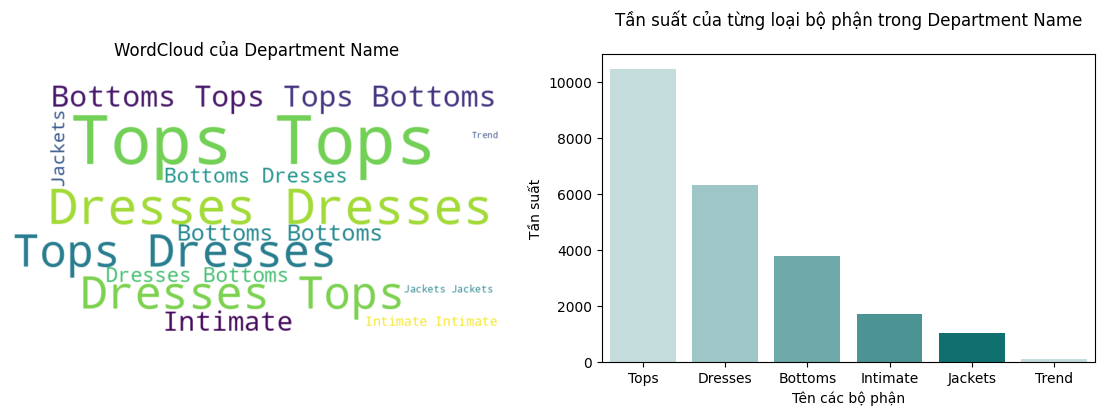

In [ ]:
text = " ".join(data["Department Name"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
department_name = data["Department Name"].value_counts()
print(department_name)

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("WordCloud của Department Name\n")

colors = ['#C0E0E0', '#99CCCC', '#66B2B2', '#40A0A0', '#008080']
sns.countplot(x="Department Name", data=data, order=department_name.index, palette=colors, ax=ax[1])
ax[1].set_title("Tần suất của từng loại bộ phận trong Department Name\n")
ax[1].set_ylabel("Tần suất")
ax[1].set_xlabel("Tên các bộ phận")
plt.show()

### Class Name

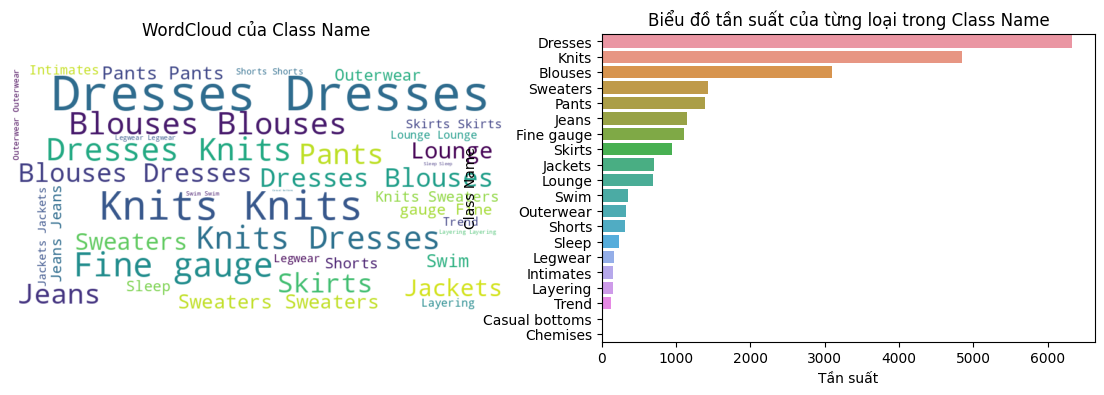

In [ ]:
text = " ".join(data["Class Name"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
class_name = data["Class Name"].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(14, 4))
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis('off')
ax[0].set_title("WordCloud của Class Name\n")

sns.countplot(y="Class Name", data=data, order=class_name.index)
ax[1].set_title("Biểu đồ tần suất của từng loại trong Class Name")
ax[1].set_xlabel("Tần suất")

plt.show()

## III. Làm sạch dữ liệu

### 1.Xử lý dữ liệu bị thiếu

In [ ]:
len(data)-data.count()

Age                 0
Rating              0
Recommended IND     0
Division Name      14
Department Name    14
Class Name         14
dtype: int64

In [ ]:
data = data.dropna(subset=['Division Name', 'Department Name', 'Class Name'])

### 2.Xử lý dữ liệu không nhất quán

In [ ]:
# Tuổi từ 18 - 99
print('Tuổi lớn nhất ',data['Age'].max(),'\nTuổi nhỏ nhất', data['Age'].min())

# Rating
print('Rating: ',data['Rating'].unique()) # từ 1 đến 5

# Recommended IND
print('Recommended IND: ',data['Recommended IND'].unique()) # 0 với 1

# Division Name
print('Division Name: ',data['Division Name'].unique())

# Department Name
print('Department Name: ',data['Department Name'].unique())

# Class Name
print('Class Name: ',data['Class Name'].unique())

Tuổi lớn nhất  99 
Tuổi nhỏ nhất 18
Rating:  [4 5 3 2 1]
Recommended IND:  [1 0]
Division Name:  ['Initmates' 'General' 'General Petite']
Department Name:  ['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend']
Class Name:  ['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' 'Chemises']


### 3.Xử lý dữ liệu nhiễu

#### Age

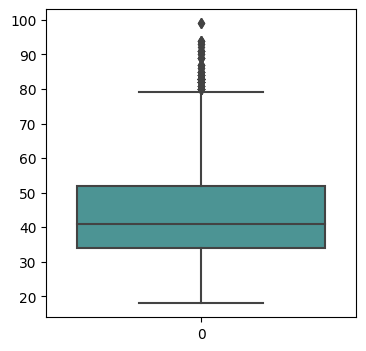

In [ ]:
a = np.array(data['Age'].reset_index(drop=True))
# Quan sát outlier(s) dựa trên Boxplot với màu #40A0A0
plt.figure(figsize=(4, 4))
sns.boxplot(a, color='#40A0A0')

plt.show()

In [ ]:
# Tính IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Xác định giới hạn dưới và giới hạn trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xác định giá trị ngoại lệ
outliers = (data['Age'] < lower_bound) | (data['Age'] > upper_bound)

# In giá trị ngoại lệ
print("Giá trị ngoại lệ:")
print( data.loc[outliers, 'Age'])
print('Giá trị ngoại lệ nhỏ nhất: ',data.loc[outliers, 'Age'].min())

Giá trị ngoại lệ:
95       83
234      83
277      83
628      80
659      93
         ..
22640    80
22716    87
22773    83
23001    83
23033    86
Name: Age, Length: 109, dtype: int64
Giá trị ngoại lệ nhỏ nhất:  80


In [ ]:
# Xóa outliers cột Age
data = data[data['Age'] <80]

## 4.Phân tích tương quan

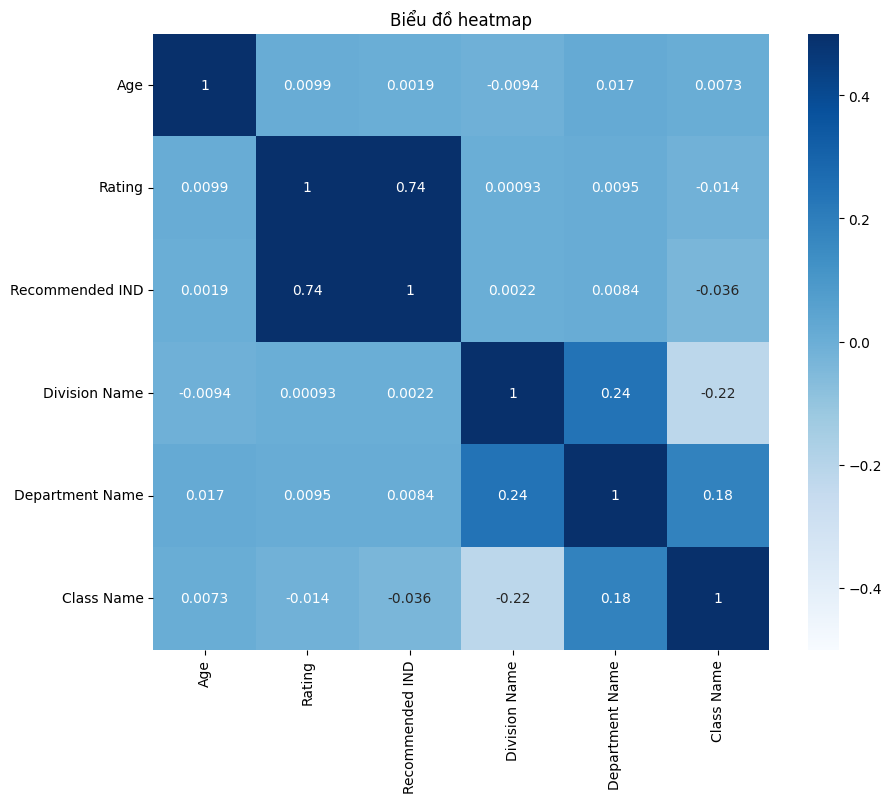

In [ ]:
corr_matrix = data.apply(lambda x: pd.factorize(x)[0]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', square=True, vmin=-0.5, vmax=0.5)
plt.title('Biểu đồ heatmap')
plt.show()

## IV. Phân tích đa biến

### Age

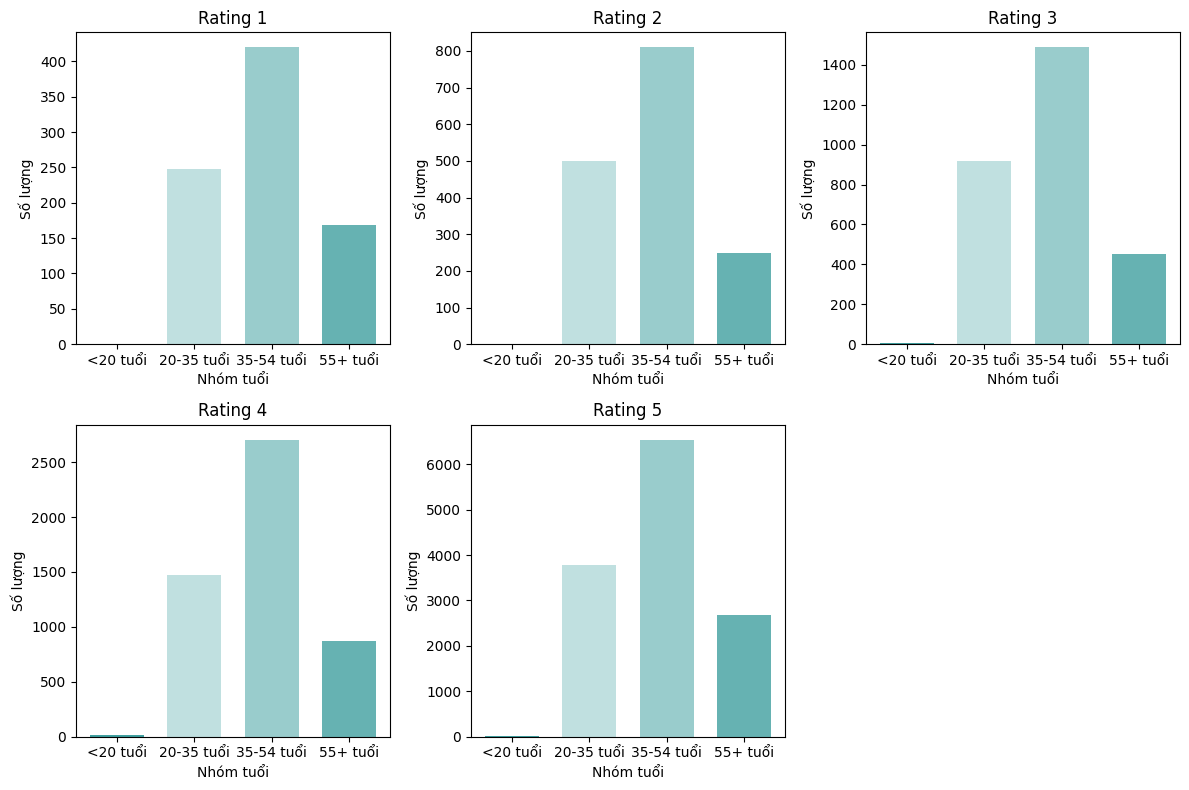

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

age_groups = ['<20 tuổi', '20-35 tuổi', '35-54 tuổi', '55+ tuổi']
rating_counts = {1: [0, 0, 0, 0], 2: [0, 0, 0, 0], 3: [0, 0, 0, 0], 4: [0, 0, 0, 0], 5: [0, 0, 0, 0]}

for index, row in data.iterrows():
    age = row['Age']
    rating = row['Rating']
    if age < 20:
        rating_counts[rating][0] += 1
    elif age <= 35:
        rating_counts[rating][1] += 1
    elif age <= 54:
        rating_counts[rating][2] += 1
    else:
        rating_counts[rating][3] += 1

fig = plt.figure(figsize=(12, 8))
gs = GridSpec(2, 3)

labels = ['1', '2', '3', '4', '5']
x = range(len(age_groups))

colors = [ '#40A0A0', '#C0E0E0', '#99CCCC', '#66B2B2']
for i, rating in enumerate(labels):
    if i < 3:
        ax = fig.add_subplot(gs[0, i])
    else:
        ax = fig.add_subplot(gs[1, i-3])
    counts = [rating_counts[int(rating)][j] for j in range(len(age_groups))]
    ax.bar(x, counts, width=0.7, color=colors)
    ax.set_title(f'Rating {rating}')
    ax.set_xlabel('Nhóm tuổi')
    ax.set_ylabel('Số lượng')
    ax.set_xticks(x)
    ax.set_xticklabels(age_groups)

plt.tight_layout()
plt.show()

### Recommended IND

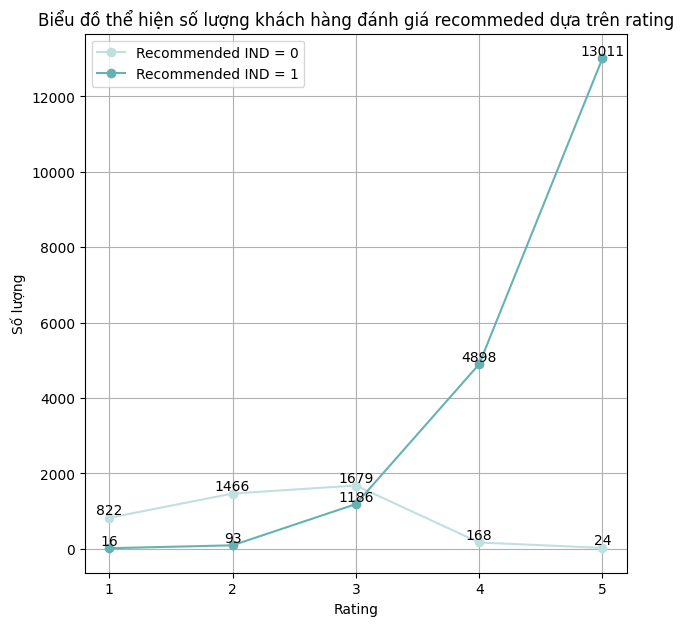

In [ ]:
#Biểu đồ thể hiện số lượng khách hàng đánh giá recommeded dựa trên rating
desired_x_values = [1, 2, 3, 4, 5]

data_filtered_0 = data[data["Recommended IND"] == 0]
ratings_count_0 = data_filtered_0["Rating"].value_counts().sort_index()
data_filtered_1 = data[data["Recommended IND"] == 1]
ratings_count_1 = data_filtered_1["Rating"].value_counts().sort_index()

plt.figure(figsize=(7, 7))
plt.plot(ratings_count_0.index, ratings_count_0.values, marker='o', linestyle='-', label='Recommended IND = 0', color = '#C0E0E0')
for i, v in enumerate(ratings_count_0.values):
    plt.text(ratings_count_0.index[i], v + 5, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.plot(ratings_count_1.index, ratings_count_1.values, marker='o', linestyle='-', label='Recommended IND = 1', color = '#66B2B2')
for i, v in enumerate(ratings_count_1.values):
    plt.text(ratings_count_1.index[i], v + 5, str(v), ha='center', va='bottom', fontsize=10, color='black')

plt.title('Biểu đồ thể hiện số lượng khách hàng đánh giá recommeded dựa trên rating')
plt.xlabel('Rating')
plt.ylabel('Số lượng')
plt.grid(True)

plt.xticks(desired_x_values)

plt.legend()

plt.show()

### Division Name

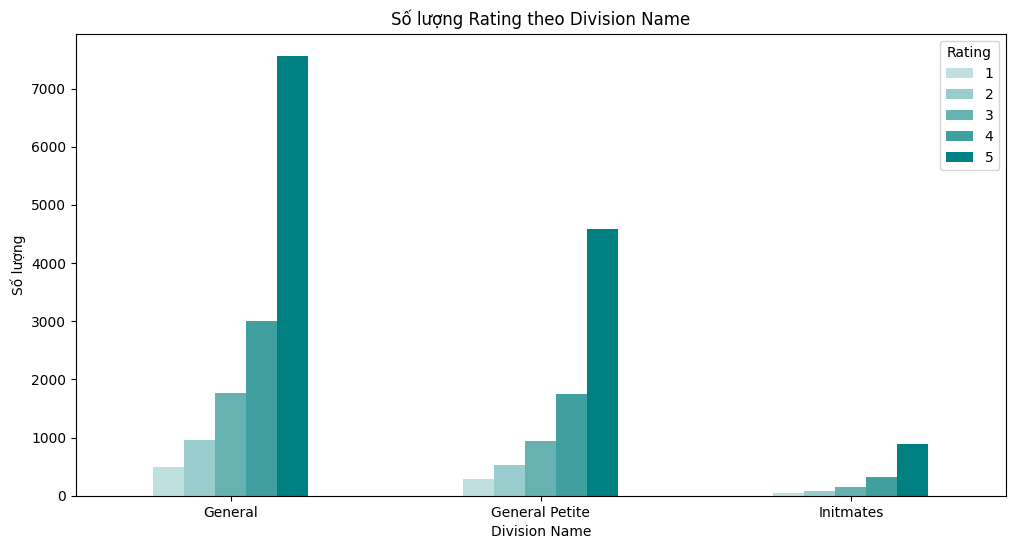

In [ ]:
#Biểu đồ thể hiện số lượng khách hành đánh giá rating theo Devision Name
department_rating_count = data.groupby(['Division Name', 'Rating'])['Rating'].count()
department_rating_count = department_rating_count.unstack()
department_rating_count.columns = range(1, 6)  # Tạo các cột từ 1 đến 5

colors = ['#C0E0E0', '#99CCCC', '#66B2B2', '#40A0A0', '#008080']
ax = department_rating_count.plot(kind='bar', figsize=(12, 6), color=colors)

plt.title('Số lượng Rating theo Division Name')
plt.xlabel('Division Name')
plt.ylabel('Số lượng')
plt.xticks(rotation=0)
plt.legend(title='Rating')

plt.show()

### Department Name

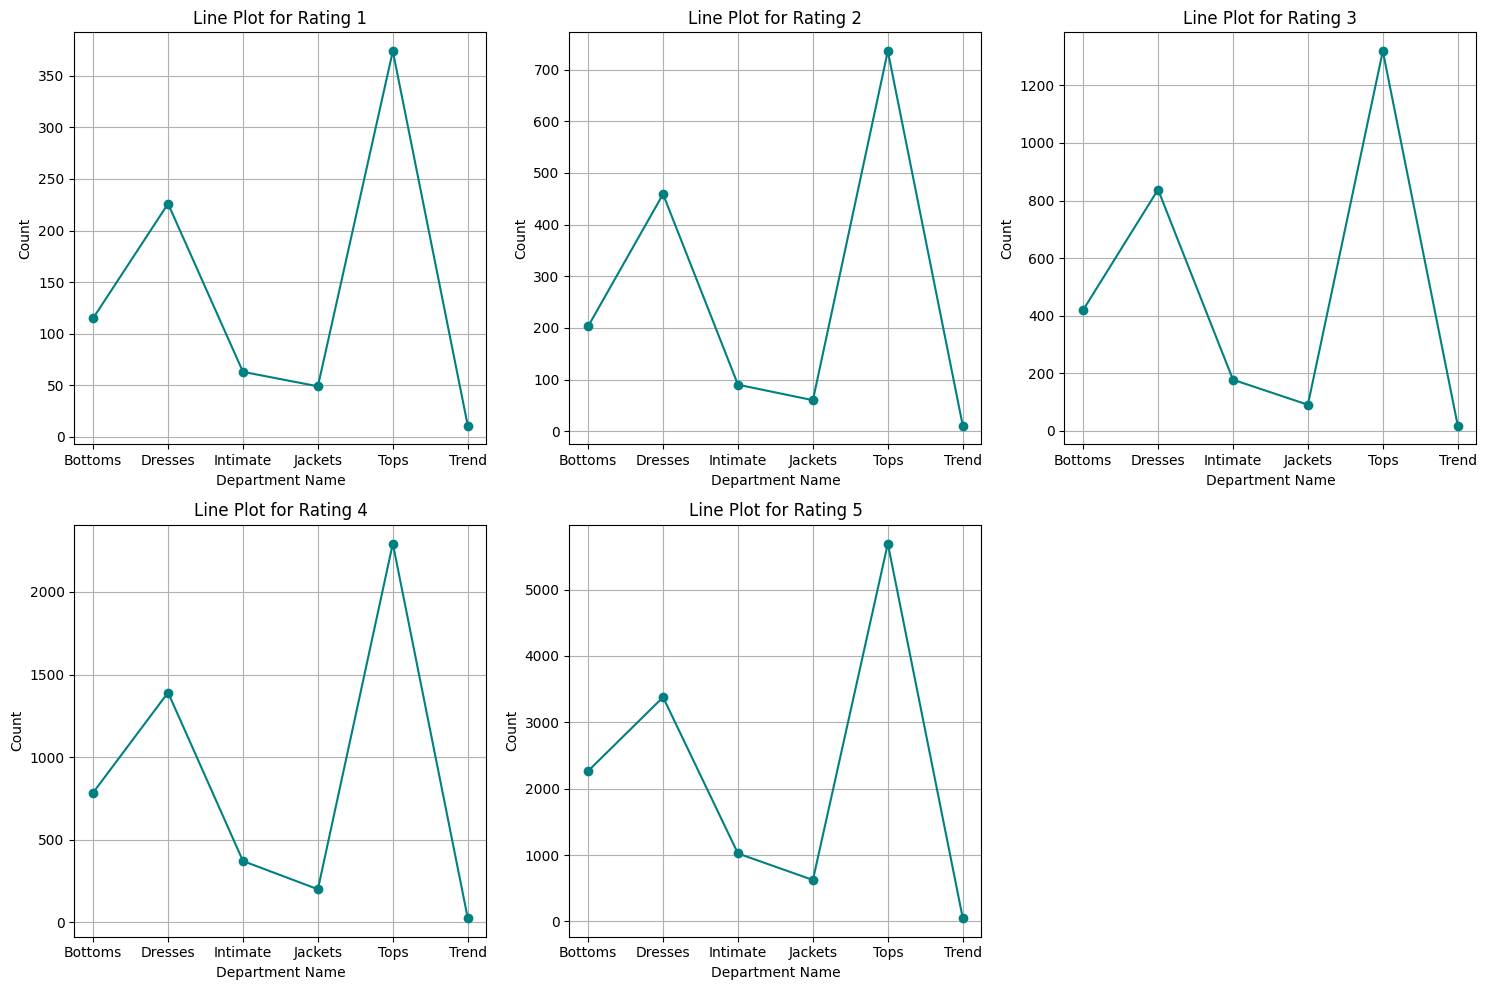

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, rating in enumerate(range(1, 6)):
    filtered_data = data[data['Rating'] == rating]
    department_counts = filtered_data['Department Name'].value_counts().sort_index()
    row = i // 3
    col = i % 3
    axes[row, col].plot(department_counts.index, department_counts.values, marker='o', color='#008080')
    axes[row, col].set_title(f'Line Plot for Rating {rating}')
    axes[row, col].set_xlabel('Department Name')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_xticklabels(department_counts.index, rotation=0, ha='center')
    axes[row, col].grid(True)

axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

### Class Name

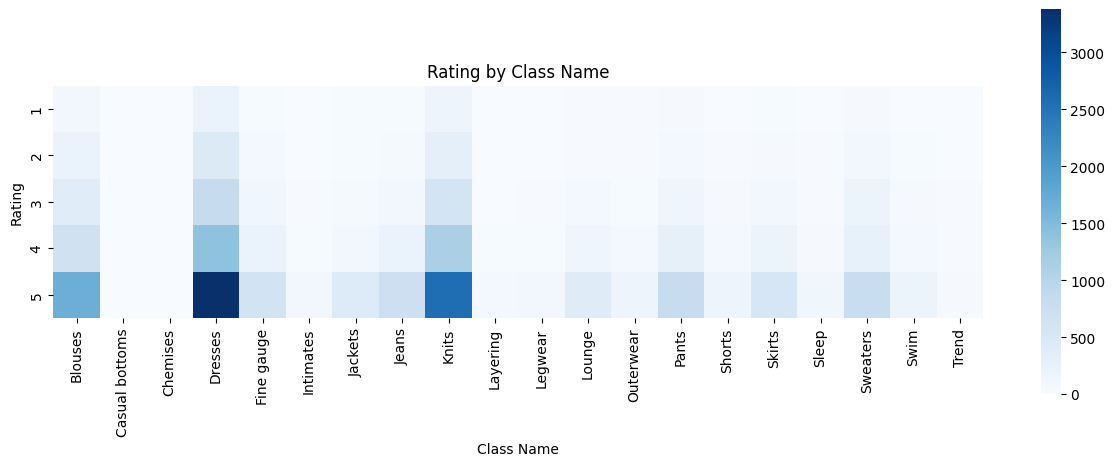

In [ ]:
# Biểu đồ heatmap giữa Rating và Class Name
freq_table = pd.crosstab(data["Rating"], data["Class Name"])
fig, ax = plt.subplots(figsize= (15, 5))
sns.heatmap(freq_table, cmap="Blues", annot=False, square=True)
plt.xlabel('Class Name')
plt.ylabel('Rating')
plt.title('Rating by Class Name')
plt.show()

## VI. Chuyển dạng dữ liệu

### 1.Label Encoding

In [ ]:
label_encoder = LabelEncoder()
data['Division Name']= label_encoder.fit_transform(data['Division Name'])
print('Division Name: ',data['Division Name'].unique())

Division Name:  [2 0 1]


In [ ]:
data['Department Name']= label_encoder.fit_transform(data['Department Name'])
print('Department Name: ',data['Department Name'].unique())

Department Name:  [2 1 0 4 3 5]


In [ ]:
data['Class Name']= label_encoder.fit_transform(data['Class Name'])
print('Class Name: ',data['Class Name'].unique())

Class Name:  [ 5  3 13  0  8 12 11 17 15  4 16  6 18 19  7 10 14  9  1  2]


In [ ]:
data.info()
data.to_csv(folder+"/data_tree.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23363 entries, 0 to 23485
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              23363 non-null  int64 
 1   Rating           23363 non-null  object
 2   Recommended IND  23363 non-null  object
 3   Division Name    23363 non-null  int64 
 4   Department Name  23363 non-null  int64 
 5   Class Name       23363 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


### 2.Normalization - MinMax Scaler

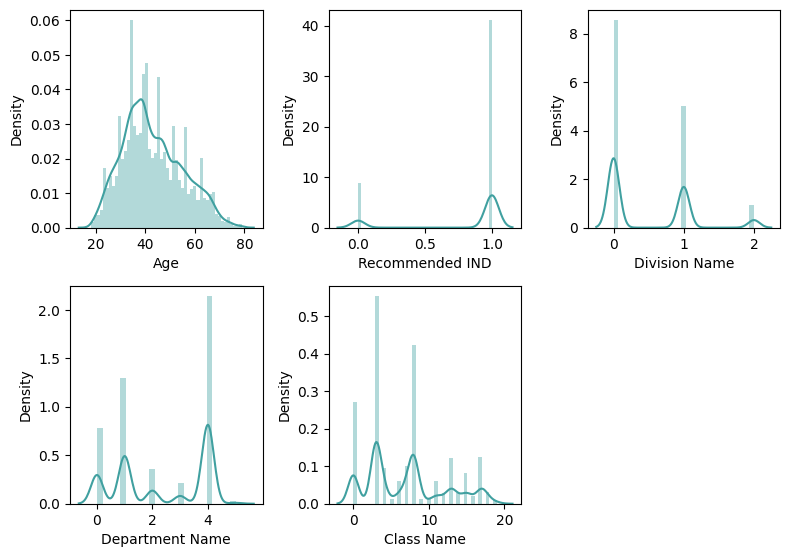

In [ ]:
data = pd.read_csv(folder+"/data_tree.csv")
fig = plt.figure(figsize = ([8, 8]))
plt.subplot(3, 3, 1)
sns.distplot(data['Age'], kde = True, hist = True, color ='#40A0A0')

plt.subplot(3, 3, 2)
sns.distplot(data['Recommended IND'], kde = True, hist = True, color ='#40A0A0')

plt.subplot(3, 3, 3)
sns.distplot(data['Division Name'], kde = True, hist = True, color ='#40A0A0')

plt.subplot(3, 3, 4)
sns.distplot(data['Department Name'], kde = True, hist = True, color ='#40A0A0')

plt.subplot(3, 3, 5)
sns.distplot(data['Class Name'], kde = True, hist = True, color ='#40A0A0')

plt.tight_layout()
plt.show()

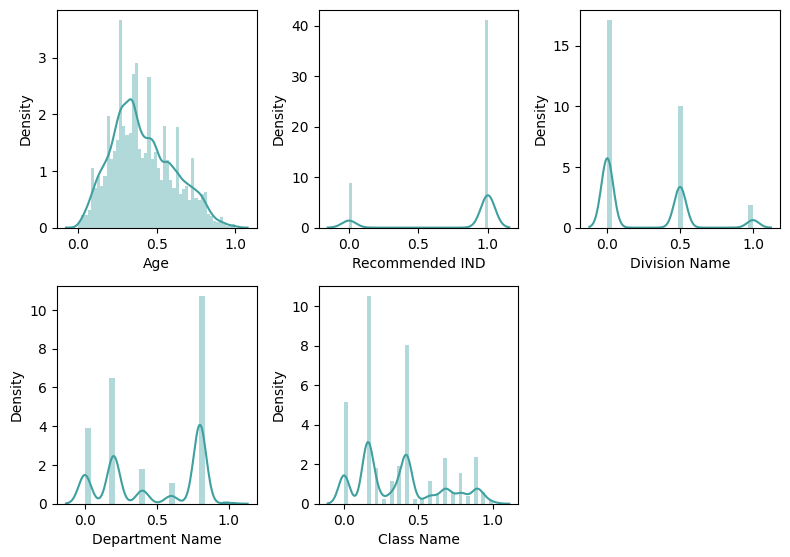

In [ ]:
## Chuẩn hóa dữ liệu
a = data.drop(['Rating'], axis=1)
scaler       = MinMaxScaler()
MinMax_array = scaler.fit_transform(a) # dạng array
MinMax_df    = pd.DataFrame(MinMax_array, columns = ['Age', 'Recommended IND', 'Division Name', 'Department Name', 'Class Name'])

fig = plt.figure(figsize = ([8, 8]))
plt.subplot(3, 3, 1)
sns.distplot(MinMax_df['Age'], kde = True, hist = True, color ='#40A0A0')

plt.subplot(3, 3, 2)
sns.distplot(MinMax_df['Recommended IND'], kde = True, hist = True, color ='#40A0A0')

plt.subplot(3, 3, 3)
sns.distplot(MinMax_df['Division Name'], kde = True, hist = True, color ='#40A0A0')

plt.subplot(3, 3, 4)
sns.distplot(MinMax_df['Department Name'], kde = True, hist = True, color ='#40A0A0')

plt.subplot(3, 3, 5)
sns.distplot(MinMax_df['Class Name'], kde = True, hist = True, color ='#40A0A0')

plt.tight_layout()
plt.show()

data = pd.concat([MinMax_df, data['Rating']], axis=1)

In [ ]:
data.info()
data.to_csv(folder+"/data_linear_K-NN.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23363 entries, 0 to 23362
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              23363 non-null  float64
 1   Recommended IND  23363 non-null  float64
 2   Division Name    23363 non-null  float64
 3   Department Name  23363 non-null  float64
 4   Class Name       23363 non-null  float64
 5   Rating           23363 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [ ]:
data['Rating'].unique()

array([4, 5, 3, 2, 1])

# Chương 4. Phân lớp

## 1.Các mô hình phân lớp

### 1.1. Mô hình K-NN và Logistic Regression

In [ ]:
data_linear_KNN = pd.read_csv(folder + "/data_linear_K-NN.csv")
data_linear_KNN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23363 entries, 0 to 23362
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              23363 non-null  float64
 1   Recommended IND  23363 non-null  float64
 2   Division Name    23363 non-null  float64
 3   Department Name  23363 non-null  float64
 4   Class Name       23363 non-null  float64
 5   Rating           23363 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 1.1 MB


In [ ]:
# Chia tập dữ liệu thành train (70%), test (20%) và validation (10%)
X = data_linear_KNN[['Age', 'Recommended IND', 'Division Name', 'Department Name', 'Class Name']]
y = data_linear_KNN['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.33, random_state=42)

#### a. Mô hình K-NN

In [ ]:
#Dùng Grid Search xác định k tốt nhất cho mô hình KNN
param_grid = {'n_neighbors': list(range(1, 21))}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
best_score = grid_search.best_score_

print(f"Best k = {best_k}")
print(f"Best score= {best_score}")

Best k = 20
Best score= 0.6183200528787406


In [ ]:
y_train.unique()

array([5, 4, 2, 3, 1])

In [ ]:
# Tạo mô hình K-NN
knn = KNeighborsClassifier(n_neighbors= best_k)
knn.fit(X_train, y_train)
knn.fit(data_linear_KNN[['Age',
                   'Recommended IND',
                   'Division Name',
                   'Department Name',
                   'Class Name']],
        data_linear_KNN['Rating'])

KNeighborsClassifier(n_neighbors=20)

#### b. Mô hình Logistic Regression

In [ ]:
# Tạo mô hình Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
logistic_regression.fit(data_linear_KNN[['Age',
                                   'Recommended IND',
                                   'Division Name',
                                   'Department Name',
                                   'Class Name']],
                        data_linear_KNN['Rating'])

LogisticRegression()

### 1.2. Mô hình Decision Tree và Random Forest

In [ ]:
data_tree = pd.read_csv(folder+"/data_tree.csv")

In [ ]:
# Chia tập dữ liệu thành train (70%), test (20%) và validation (10%)
X = data_tree[['Age', 'Recommended IND', 'Division Name', 'Department Name', 'Class Name']]
y = data_tree['Rating']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)
X_test1, X_val1, y_test1, y_val1 = train_test_split(X_test1, y_test1, test_size=0.33, random_state=42)

#### c. Mô hình Decision Tree

In [ ]:
# Tạo mô hình Decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train1, y_train1)
decision_tree.fit(data_tree[['Age',
                             'Recommended IND',
                             'Division Name',
                             'Department Name',
                             'Class Name']],
                  data_tree['Rating'])

DecisionTreeClassifier()

#### d. Mô hình Random Forest

In [ ]:
# Tạo mô hình Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train1, y_train1)
random_forest.fit(data_tree[['Age',
                             'Recommended IND',
                             'Division Name',
                             'Department Name',
                             'Class Name']],
                  data_tree['Rating'])

RandomForestClassifier()

## 2.Đánh giá mô hình

###2.1. Đánh giá mô hình bằng classification_report, confusion_matrix

In [ ]:
models = [KNeighborsClassifier(n_neighbors = best_k),
          LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

In [ ]:
def Xtrain(model):
  if model == KNeighborsClassifier(n_neighbors = best_k) or model == LogisticRegression():
    return X_train
  return X_train1

def ytrain(model):
  if model == KNeighborsClassifier(n_neighbors = best_k) or model == LogisticRegression():
    return y_train
  return y_train1

def Xtest(model):
  if model == KNeighborsClassifier(n_neighbors = best_k) or model == LogisticRegression():
    return X_test
  return X_test1

def ytest(model):
  if model == KNeighborsClassifier(n_neighbors = best_k) or model == LogisticRegression():
    return y_test
  return y_test1

def Xval(model):
  if model == KNeighborsClassifier(n_neighbors = best_k) or model == LogisticRegression():
    return X_val
  return X_val1

def yval(model):
  if model == KNeighborsClassifier(n_neighbors = best_k) or model == LogisticRegression():
    return y_val
  return y_val1


In [ ]:
def evaluate_models(models):
    results_val = {}
    best_model_val = None
    best_accuracy_val = 0.0
    best_accuracy_test = 0.0

    for model in models:
        model_name = model.__class__.__name__
        model.fit(Xtrain(model), ytrain(model))

        y_pred_val = model.predict(Xval(model))
        accuracy_val = accuracy_score(yval(model), y_pred_val)
        classification_rep_val = classification_report(yval(model), y_pred_val)
        confusion_matrix_val = confusion_matrix(yval(model), y_pred_val)
        results_val[model_name] = {
            'accuracy': accuracy_val,
            'classification_report': classification_rep_val,
            'confusion_matrix': confusion_matrix_val
        }

        print(f"Mô hình: {model_name}")
        print("Đánh giá trên Validation Set:")
        print(f"Accuracy: {accuracy_val}")
        print("Classification Report: \n", classification_rep_val)
        print("Confusion Matrix: \n", confusion_matrix_val)
        print("---------------------------------\n")

    return results_val

results_val = evaluate_models(models)


Mô hình: KNeighborsClassifier
Đánh giá trên Validation Set:
Accuracy: 0.5745784695201037
Classification Report: 
               precision    recall  f1-score   support

           1       0.50      0.06      0.10        87
           2       0.36      0.19      0.25       161
           3       0.45      0.17      0.25       269
           4       0.17      0.02      0.03       530
           5       0.60      0.98      0.74      1266

    accuracy                           0.57      2313
   macro avg       0.42      0.28      0.28      2313
weighted avg       0.46      0.57      0.47      2313

Confusion Matrix: 
 [[   5   24   15    4   39]
 [   3   31   37    5   85]
 [   2   31   47    9  180]
 [   0    0    6   10  514]
 [   0    0    0   30 1236]]
---------------------------------

Mô hình: LogisticRegression
Đánh giá trên Validation Set:
Accuracy: 0.6208387375702551
Classification Report: 
               precision    recall  f1-score   support

           1       0.00      0.00 

In [ ]:
# Đánh giá mô hình trên Test set (đánh giá cuối cùng)
y_pred_test = random_forest.predict(X_test1)
accuracy_test = accuracy_score(y_test1, y_pred_test)
print("Đánh giá mô hình Random Forest trên Test Set:")
print(f"Accuracy: {accuracy_test}")
print("Confusion Matrix: \n", confusion_matrix(y_test1, y_pred_test))
print("Classification Report: \n", classification_report(y_test1, y_pred_test))
print("---------------------------------\n")

Đánh giá mô hình Random Forest trên Test Set:
Accuracy: 0.6686541737649063
Confusion Matrix: 
 [[  51   45   54    1    4]
 [  15  197   90    0   11]
 [  19   82  257    6  242]
 [   2   15   14   71  921]
 [   0    0    3   32 2564]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.59      0.33      0.42       155
           2       0.58      0.63      0.60       313
           3       0.61      0.42      0.50       606
           4       0.65      0.07      0.13      1023
           5       0.69      0.99      0.81      2599

    accuracy                           0.67      4696
   macro avg       0.62      0.49      0.49      4696
weighted avg       0.66      0.67      0.59      4696

---------------------------------



In [ ]:
# Đánh giá điểm số bằng cross-validation.
folds = 10
best_model=''
best_acr=0
for model in models:
    model_name = model.__class__.__name__
    if model_name in ['KNeighborsClassifier','LogisticRegression']:
      data_acr= data_linear_KNN
    else:
      data_acr= data_tree
    X = data_acr.drop('Rating', axis=1)
    y = data_acr['Rating']
    accuracies = cross_val_score(model, X, y, scoring = 'accuracy', cv = folds)
    if accuracies.mean() > best_acr:
      best_acr= accuracies.mean()
      best_model = model_name
    print(f'Accuracy (trung bình) của mô hình {model_name} = {accuracies.mean():.4f}')
print('-----------')
print('Mô hình tốt nhất là: ', best_model )

Accuracy (trung bình) của mô hình KNeighborsClassifier = 0.6187
Accuracy (trung bình) của mô hình LogisticRegression = 0.6277
Accuracy (trung bình) của mô hình DecisionTreeClassifier = 0.5961
Accuracy (trung bình) của mô hình RandomForestClassifier = 0.6072
-----------
Mô hình tốt nhất là:  LogisticRegression


## 3.Áp dụng mô hình để dự báo rating của khách hàng

In [ ]:
y_pred = logistic_regression.predict(X_test)
data_pred = pd.concat([X_test.reset_index(drop=True), pd.Series(y_pred, name = 'Rating_pred')], axis=1)
data_pred


,Age,Recommended IND,Division Name,Department Name,Class Name,Rating_pred
0,0.770492,1.0,1.0,0.4,0.842105,5
1,0.524590,1.0,0.5,0.0,0.368421,5
2,0.377049,1.0,0.0,0.2,0.157895,5
3,0.639344,0.0,0.5,0.2,0.157895,3
4,0.606557,1.0,0.0,0.0,0.684211,5
...,...,...,...,...,...,...
4691,0.590164,1.0,0.0,0.8,0.421053,5
4692,0.311475,1.0,0.0,0.8,0.000000,5
4693,0.459016,1.0,0.0,0.2,0.157895,5
4694,0.475410,1.0,0.0,0.0,0.684211,5


In [ ]:
y_pred = random_forest.predict(X_test1)
data_pred = pd.concat([X_test1.reset_index(drop=True), pd.Series(y_pred, name = 'Rating_pred')], axis=1)
data_pred

,Age,Recommended IND,Division Name,Department Name,Class Name,Rating_pred
0,65,1,2,2,16,5
1,50,1,1,0,7,5
2,41,1,0,1,3,5
3,57,0,1,1,3,1
4,55,1,0,0,13,5
...,...,...,...,...,...,...
4691,54,1,0,4,8,5
4692,37,1,0,4,0,5
4693,46,1,0,1,3,5
4694,47,1,0,0,13,5
